In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import seaborn as sn
from sklearn.metrics import confusion_matrix
import re
%matplotlib inline
from sklearn import model_selection, preprocessing, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [2]:
df_inputdata=pd.read_csv('D:\Internships\Projects\SpamHam.csv',usecols = [0,1],encoding='latin-1' )

In [3]:
df_inputdata.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df_inputdata.rename(columns = {'v1':'Category','v2': 'Message'}, inplace = True)

In [5]:
df_inputdata.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df_inputdata.count()

Category    5572
Message     5572
dtype: int64

In [7]:
df_inputdata.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [8]:
df_inputdata.groupby('Category').count()

,Message
Category,
ham,4825
spam,747


#### Exploratory Data Analysis

In [9]:
category_count = pd.DataFrame()
category_count['count'] = df_inputdata['Category'].value_counts()

In [10]:
category_count['count']

ham     4825
spam     747
Name: count, dtype: int64

#### Draw Graph

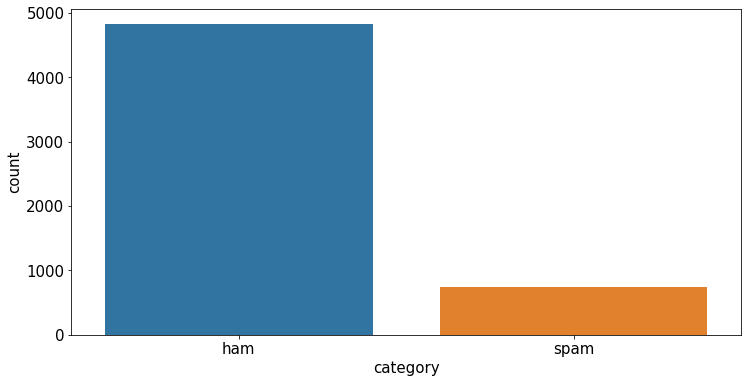

In [11]:
fig, ax = plt.subplots(figsize = (12, 6))
sn.barplot(x = category_count.index, y = category_count['count'], ax = ax)
ax.set_ylabel('count', fontsize = 15)
ax.set_xlabel('category',fontsize = 15)
ax.tick_params(labelsize=15)

In [12]:
#Looking at the above numbers of hams and spams,there are more number of hams than spams

In [1]:
#Preprocessing Tweets for removing punctuations(! , ' ),@ ,# ,https,special characters
from string import punctuation
def processMessage(tweet):
    tweet = re.sub(r'\&\w*;', '', tweet)
    tweet = re.sub('@[^\s]+','',tweet)
    tweet = re.sub(r'\$\w*', '', tweet)
    tweet = tweet.lower()
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    tweet = re.sub(r'#\w*', '', tweet)
    tweet = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', tweet)
    tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
    tweet = re.sub(r'\s\s+', ' ', tweet)
    tweet = tweet.lstrip(' ') 
    tweet = ''.join(c for c in tweet if c <= '\uFFFF') 
    return tweet

In [14]:
df_inputdata['Message'] = df_inputdata['Message'].apply(processMessage)

In [15]:
df_inputdata['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [16]:
#convert the labels from text to numbers
label_encoder = preprocessing.LabelEncoder() 
df_inputdata['Category']= label_encoder.fit_transform(df_inputdata['Category']) 

In [17]:
X = df_inputdata.Message
y = df_inputdata.Category

In [18]:
#Split the dataset into 80% and 20% for training and testing respectively
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [19]:
#Convert the raw document into a matrx of TF-IDF features
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=20000)
#Create TF-IDF with X_train
tfidf_vect.fit(X_train)

TfidfVectorizer(max_features=20000, token_pattern='\\w{1,}')

In [20]:
#Use TF-IDF created with X_train for transforming X_train and X_test
xtrain_tfidf =  tfidf_vect.transform(X_train)
xvalid_tfidf =  tfidf_vect.transform(X_test)

In [21]:
#Create a model for NaiveBayes Model
model=naive_bayes.MultinomialNB()

In [22]:
#Train the model with X_train and y_train
model.fit(xtrain_tfidf,y_train)

MultinomialNB()

In [23]:
#Get the prediction for X_test which is transformed with TF-IDF
y_pred=model.predict(xvalid_tfidf)

In [24]:
#get accuracy for the model
metrics.accuracy_score(y_test,y_pred)

0.9614349775784753

<AxesSubplot:>

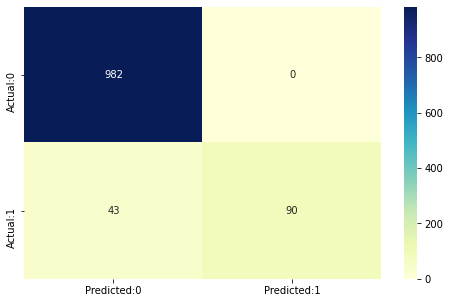

In [25]:
#Get the Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [26]:
#Ham
myData=np.array(["I know you are thinkin malaria. But relax, children cant handle malaria. She would have been worse and its gastroenteritis. If she takes enough to replace her loss her temp will reduce. And if you give her malaria meds now she will just vomit. Its a self limiting illness she has which means in a few days it will completely stop"])
#Spam
#myData=np.array(['Had your contract mobile 11 Mnths? Latest Motorola, Nokia etc. all FREE! Double Mins & Text on Orange tariffs. TEXT YES for callback, no to remove from records.'])

In [27]:
myData=tfidf_vect.transform(myData)

In [28]:
y_res=model.predict(myData)

In [29]:
y_res[0]

0

In [30]:
vals=label_encoder.inverse_transform([y_res[0]])

In [31]:
vals[0]

'ham'

#### Class wise report

In [32]:
from sklearn.metrics import classification_report

In [33]:
report=classification_report(y_test, y_pred, labels=[0, 1])

In [34]:
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       982
           1       1.00      0.68      0.81       133

    accuracy                           0.96      1115
   macro avg       0.98      0.84      0.89      1115
weighted avg       0.96      0.96      0.96      1115



In [35]:
type(report)

str

In [36]:
#recall= TP/(TP+FN)

In [37]:
TP=cm[0,0]

In [38]:
TP

982

In [39]:
TN=cm[0,1]

In [40]:
TN

0

In [41]:
FN=cm[1,0]

In [42]:
FN

43

In [43]:
TN=cm[1,1]

In [44]:
TN

90

In [45]:
recall= TP/(TP+FN)

In [46]:
recall

0.9580487804878048

In [47]:
#precision=TP/(TP+FP)

In [48]:
FP=cm[0,1]

In [49]:
precision=TP/(TP+FP)

In [50]:
precision

1.0

In [51]:
#F1-Score

In [52]:
F1 = 2 * (precision * recall) / (precision + recall)

In [53]:
F1

0.9785749875435974

In [54]:
#Good F1 Score means low false positives and negatives 
#Precision - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.
#Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class
#F1 score - F1 Score is the weighted average of Precision and Recall